In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_data = "data/Mouse_metadata.csv"
results_data = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_data = pd.read_csv(mouse_data)
results_data = pd.read_csv(results_data)
mouse_data.head()

# Combine the data into a single dataset
file = pd.merge(mouse_data,results_data, on="Mouse ID",how='outer')
file.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
file_drug = file.groupby("Drug Regimen")
file_drug_volume = file_drug["Tumor Volume (mm3)"].mean()
file_drug_median = file_drug["Tumor Volume (mm3)"].median()
file_drug_variance = file_drug["Tumor Volume (mm3)"].var()
file_drug_sd = file_drug["Tumor Volume (mm3)"].std()
file_drug_SEM = file_drug["Tumor Volume (mm3)"].sem()
Summary_stats = pd.DataFrame({"Mean of Tumor Volume":file_drug_volume,"Median of Tumor Volume":file_drug_median,
                             "Variance of Tumor Volume":file_drug_variance,"Standard Deviation of Tumor Volume":file_drug_sd,
                             "SEM of Tumor Volume":file_drug_SEM})
Summary_stats


,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


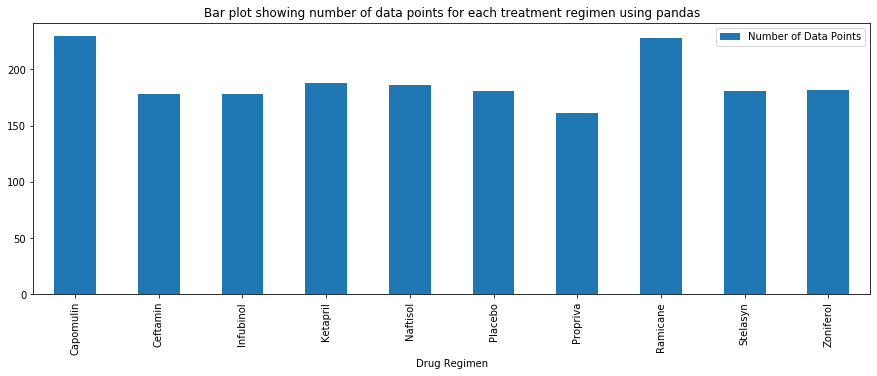

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
file_drug_count = file_drug["Mouse ID"].count()
file_datapoint = pd.DataFrame({"Number of Data Points":file_drug_count})
file_datapoint.plot(kind="bar",figsize=(15,5),title="Bar plot showing number of data points for each treatment regimen using pandas")

<BarContainer object of 10 artists>

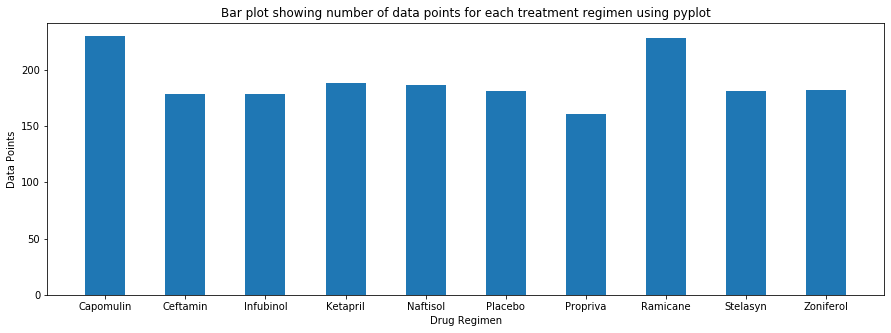

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
file_count = file["Drug Regimen"].value_counts().rename_axis('Drug Regimen').reset_index(name='Data Points')
file_summary = file_count.sort_values("Drug Regimen",ascending=True)
x_axis = file_summary["Drug Regimen"]
y_axis = file_summary["Data Points"]
plt.figure(figsize=(15,5))
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.title("Bar plot showing number of data points for each treatment regimen using pyplot")
plt.bar(x_axis,y_axis,width=0.5,alpha=1,align="center")

Male      958
Female    935
Name: Sex, dtype: int64

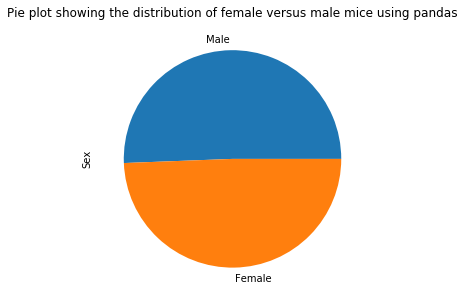

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
file_gender = file["Sex"].value_counts()
file_gender.plot.pie(y="a",figsize=(15,5),title="Pie plot showing the distribution of female versus male mice using pandas")
file_gender

([<matplotlib.patches.Wedge at 0x1549e718688>,
 [Text(-0.021946708175884767, 1.1497905644073805, 'Male'),
  Text(0.020992503472585782, -1.0997996703027118, 'Female')],
 [Text(-0.012404661142891387, 0.6498816233606933, '50.6%'),
  Text(0.011450456439592244, -0.5998907292560246, '49.4%')])

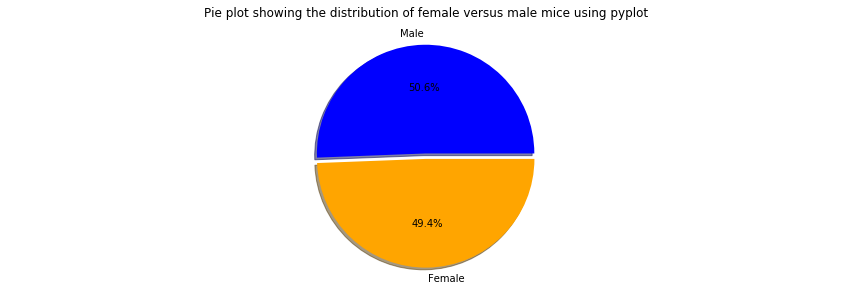

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_count = len(file.loc[file["Sex"]=="Male"])
female_count = len(file.loc[file["Sex"]=="Female"])
labels=["Male","Female"]
counts = [male_count,female_count]
colors = ["blue","orange"]
explode = (0.05,0)
plt.figure(figsize=(15,5))
plt.title("Pie plot showing the distribution of female versus male mice using pyplot")
plt.axis("equal")
plt.pie(counts, explode=explode, labels=labels,colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
file_Capomulin = file.loc[file["Drug Regimen"]=="Capomulin",:]
file_Capomulin_time = file_Capomulin.loc[file_Capomulin["Timepoint"]==file_Capomulin["Timepoint"].max(),:]
file_Capomulin_time[["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]
quartiles_Capomulin = file_Capomulin_time["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_Capomulin = quartiles_Capomulin[0.25]
upperq_Capomulin = quartiles_Capomulin[0.75]
iqr_Capomulin = upperq_Capomulin-lowerq_Capomulin
lower_bound_Capomulin = lowerq_Capomulin - (1.5*iqr_Capomulin)
upper_bound_Capomulin = upperq_Capomulin + (1.5*iqr_Capomulin)
file_Ramicane = file.loc[file["Drug Regimen"]=="Ramicane",:]
file_Ramicane_time = file_Ramicane.loc[file_Ramicane["Timepoint"]==file_Ramicane["Timepoint"].max(),:]
file_Ramicane_time[["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]
quartiles_Ramicane = file_Ramicane_time["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_Ramicane = quartiles_Ramicane[0.25]
upperq_Ramicane = quartiles_Ramicane[0.75]
iqr_Ramicane = upperq_Ramicane-lowerq_Ramicane
lower_bound_Ramicane = lowerq_Ramicane - (1.5*iqr_Ramicane)
upper_bound_Ramicane = upperq_Ramicane + (1.5*iqr_Ramicane)
file_Infubinol = file.loc[file["Drug Regimen"]=="Infubinol",:]
file_Infubinol_time = file_Infubinol.loc[file_Infubinol["Timepoint"]==file_Infubinol["Timepoint"].max(),:]
file_Infubinol_time[["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]
quartiles_Infubinol = file_Infubinol_time["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_Infubinol = quartiles_Infubinol[0.25]
upperq_Infubinol = quartiles_Infubinol[0.75]
iqr_Infubinol = upperq_Infubinol-lowerq_Infubinol
lower_bound_Infubinol = lowerq_Infubinol - (1.5*iqr_Infubinol)
upper_bound_Infubinol = upperq_Infubinol + (1.5*iqr_Infubinol)
file_Ceftamin = file.loc[file["Drug Regimen"]=="Ceftamin",:]
file_Ceftamin_time = file_Ceftamin.loc[file_Ceftamin["Timepoint"]==file_Ceftamin["Timepoint"].max(),:]
file_Ceftamin_time[["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]
quartiles_Ceftamin = file_Ceftamin_time["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_Ceftamin = quartiles_Ceftamin[0.25]
upperq_Ceftamin = quartiles_Ceftamin[0.75]
iqr_Ceftamin = upperq_Ceftamin-lowerq_Ceftamin
lower_bound_Ceftamin = lowerq_Ceftamin - (1.5*iqr_Ceftamin)
upper_bound_Ceftamin = upperq_Ceftamin + (1.5*iqr_Ceftamin)
print(f"For Capomulin Drug Regimen, the median of Final Tumor Volume(mm3) is: {quartiles_Capomulin[0.5]} ")
print(f"For Capomulin Drug Regimen, the Final Tumor Volume(mm3) Values below {lower_bound_Capomulin} could be outliers.")
print(f"For Capomulin Drug Regimen, the Final Tumor Volume(mm3) Values above {upper_bound_Capomulin} could be outliers.")
print("\n" f"For Ramicane Drug Regimen, the median of Final Tumor Volume(mm3) is: {quartiles_Ramicane[0.5]} ")
print(f"For Ramicane Drug Regimen, the Final Tumor Volume(mm3) Values below {lower_bound_Ramicane} could be outliers.")
print(f"For Ramicane Drug Regimen, the Final Tumor Volume(mm3) Values above {upper_bound_Ramicane} could be outliers.")
print("\n" f"For Infubinol Drug Regimen, the median of Final Tumor Volume(mm3) is: {quartiles_Infubinol[0.5]} ")
print(f"For Infubinol Drug Regimen, the Final Tumor Volume(mm3) Values below {lower_bound_Infubinol} could be outliers.")
print(f"For Infubinol Drug Regimen, the Final Tumor Volume(mm3) Values above {upper_bound_Infubinol} could be outliers.")
print("\n" f"For Ceftamin Drug Regimen, the median of Final Tumor Volume(mm3) is: {quartiles_Ceftamin[0.5]} ")
print(f"For Ceftamin Drug Regimen, the Final Tumor Volume(mm3) Values below {lower_bound_Ceftamin} could be outliers.")
print(f"For Ceftamin Drug Regimen, the Final Tumor Volume(mm3) Values above {upper_bound_Ceftamin} could be outliers.")

For Capomulin Drug Regimen, the median of Final Tumor Volume(mm3) is: 37.31184577 
For Capomulin Drug Regimen, the Final Tumor Volume(mm3) Values below 20.70456164999999 could be outliers.
For Capomulin Drug Regimen, the Final Tumor Volume(mm3) Values above 51.83201549 could be outliers.

For Ramicane Drug Regimen, the median of Final Tumor Volume(mm3) is: 34.848627300000004 
For Ramicane Drug Regimen, the Final Tumor Volume(mm3) Values below 19.690480101250003 could be outliers.
For Ramicane Drug Regimen, the Final Tumor Volume(mm3) Values above 49.79900043124999 could be outliers.

For Infubinol Drug Regimen, the median of Final Tumor Volume(mm3) is: 66.08306589 
For Infubinol Drug Regimen, the Final Tumor Volume(mm3) Values below 55.35777559500001 could be outliers.
For Infubinol Drug Regimen, the Final Tumor Volume(mm3) Values above 75.08224443499999 could be outliers.

For Ceftamin Drug Regimen, the median of Final Tumor Volume(mm3) is: 64.29983003 
For Ceftamin Drug Regimen, the 

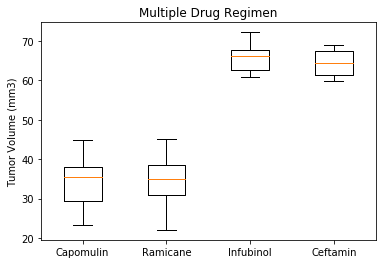

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_Capomulin = file_Capomulin_time["Tumor Volume (mm3)"]
tumor_Ramicane = file_Ramicane_time["Tumor Volume (mm3)"]
tumor_Infubinol = file_Infubinol_time["Tumor Volume (mm3)"]
tumor_Ceftamin = file_Ceftamin_time["Tumor Volume (mm3)"]
data = [tumor_Capomulin, tumor_Ramicane, tumor_Infubinol, tumor_Ceftamin]
fig1, ax1 = plt.subplots()
ax1.set_xticklabels(["Capomulin","Ramicane","Infubinol","Ceftamin"])
ax1.set_title('Multiple Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(data)
plt.show()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


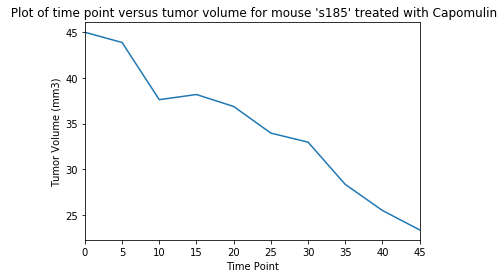

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
file_Capomulin = file.loc[file["Drug Regimen"]=="Capomulin",:]
file_Capomulin_s185 = file_Capomulin.loc[file_Capomulin["Mouse ID"]=="s185",:]
file_Capomulin_time = file_Capomulin_s185[["Mouse ID","Timepoint","Tumor Volume (mm3)"]]
plt.title(" Plot of time point versus tumor volume for mouse 's185' treated with Capomulin")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(0,file_Capomulin_s185["Timepoint"].max())
plt.plot(file_Capomulin_s185["Timepoint"], file_Capomulin_s185["Tumor Volume (mm3)"])
file_Capomulin_s185

<Figure size 1800x504 with 0 Axes>

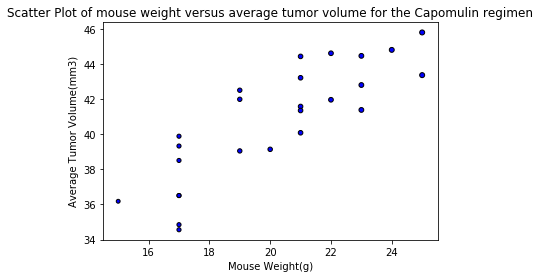

<Figure size 1800x504 with 0 Axes>

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
file_Capomulin = file.loc[file["Drug Regimen"]=="Capomulin",:]
file_Capomulin_avg = file_Capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
file_Capomulin_weight = file_Capomulin.groupby("Mouse ID")["Weight (g)"].mean()
file_summary_Cap = pd.DataFrame({"Mouse Weight":file_Capomulin_weight,"Average Tumor Volume (mm3)":file_Capomulin_avg})
plt.scatter(file_Capomulin_weight, file_Capomulin_avg, marker="o", facecolors="blue", edgecolors="black",
            s=file_Capomulin_weight, alpha=1)
plt.xlabel("Mouse Weight(g)")
plt.ylabel("Average Tumor Volume(mm3)")
plt.title("Scatter Plot of mouse weight versus average tumor volume for the Capomulin regimen")
plt.figure(figsize=(25,7))

The correlation between Mouse Weight and Average Tumor Volume is 0.84


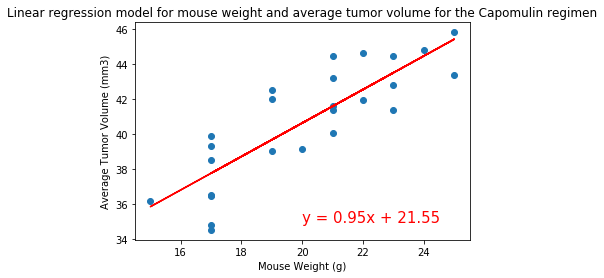

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = file_summary_Cap['Mouse Weight']
y_values = file_summary_Cap['Average Tumor Volume (mm3)']
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between Mouse Weight and Average Tumor Volume is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Linear regression model for mouse weight and average tumor volume for the Capomulin regimen")
plt.show()